In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

# I will be Following the data scince process
## 1.Business Understanding
## 2.Data Understanding
## 3.Modeling
## 4.Evaluation
## 5.Deployment

In [3]:
df=pd.read_csv('jersey city airbnb listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,40669,https://www.airbnb.com/rooms/40669,20211220161334,2021-12-21,Skyy’s Lounge / Cozy,<b>The space</b><br />Skyy’s Lounge ....Everyt...,The neighborhood is very diverse & friendly sh...,https://a0.muscache.com/pictures/af7e4a45-0118...,175412,https://www.airbnb.com/users/show/175412,...,5.00,5.00,5.00,NaN,f,2,0,2,0,0.07
1,215768,https://www.airbnb.com/rooms/215768,20211220161334,2021-12-21,Minutes to Manhattan & Jersey Shore,Walking to distance to Statue of Liberty and E...,"Such close proximity to NYC, 7 minutes on the ...",https://a0.muscache.com/pictures/miso/Hosting-...,846837,https://www.airbnb.com/users/show/846837,...,4.90,4.31,4.80,STR20-00055,f,1,1,0,0,1.10
2,269266,https://www.airbnb.com/rooms/269266,20211220161334,2021-12-20,Modern private 2 bedrooms apt minutes to NYC,Enjoy that private luxury two bedrooms apartme...,Our House is located in the Liberty State Park...,https://a0.muscache.com/pictures/5c8382e2-d2d8...,1410590,https://www.airbnb.com/users/show/1410590,...,4.65,3.80,4.44,NaN,t,8,1,7,0,3.10
3,270245,https://www.airbnb.com/rooms/270245,20211220161334,2021-12-22,Private room with own bathroom close to NYC,Just for you small bedroom with private bathro...,NaN,https://a0.muscache.com/pictures/83004bc4-6ff2...,1410590,https://www.airbnb.com/users/show/1410590,...,4.68,3.89,4.57,NaN,t,8,1,7,0,2.04
4,271255,https://www.airbnb.com/rooms/271255,20211220161334,2021-12-22,Large Room with private bathroom min to Manhattan,You can enjoy your stay in large bedroom with ...,NaN,https://a0.muscache.com/pictures/26d49bd9-efe3...,1410590,https://www.airbnb.com/users/show/1410590,...,4.56,3.76,4.37,NaN,t,8,1,7,0,2.43


In [4]:
df.shape

(1001, 74)

In [5]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

# Business Understanding
## -Factors that influence the price of a property
## -Relationship between amenities, host status and property rating

# Data Understanding
## Data Preparation
- I will prepare the data for analysis by selecting the relevant columns and creating a new dataframe.
- I will remove any unnecessary columns from the original dataframe to keep it clean and focused

In [6]:
new_df=df[['id','description','host_name','host_is_superhost','neighbourhood_cleansed','neighbourhood','latitude',
       'longitude', 'property_type', 'room_type', 'accommodates','amenities', 'price','number_of_reviews','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location','review_scores_value','reviews_per_month']].copy()

In [7]:
new_df.describe()

,id,latitude,longitude,accommodates,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,737.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,737.000000
mean,3.568748e+07,40.725206,-74.057730,3.763237,28.969031,4.635156,4.717026,4.636112,4.816617,4.791241,4.603452,4.634789,1.369824
std,1.553927e+07,0.013781,0.017792,2.549291,55.567761,0.600365,0.519104,0.526554,0.426021,0.433149,0.525898,0.474971,1.472770
min,4.066900e+04,40.680595,-74.106990,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,2.319890e+07,40.717090,-74.071460,2.000000,0.000000,4.530000,4.670000,4.500000,4.810000,4.760000,4.480000,4.530000,0.320000
50%,3.977404e+07,40.723980,-74.053690,3.000000,5.000000,4.770000,4.860000,4.780000,4.950000,4.940000,4.750000,4.740000,0.910000
75%,5.000920e+07,40.733480,-74.043180,5.000000,29.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.960000,4.940000,2.000000
max,5.389060e+07,40.760700,-74.029390,16.000000,386.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,11.170000


## Missing Values
- I will check the percentage of missing values in the dataset to understand the extent of missing data.
- Based on the results, I will decide if any missing values need to be removed before proceeding with the analysis.

In [8]:
new_df.isnull().sum()

id                               0
description                     27
host_name                        0
host_is_superhost                0
neighbourhood_cleansed           0
neighbourhood                  366
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
amenities                        0
price                            0
number_of_reviews                0
review_scores_rating           264
review_scores_accuracy         268
review_scores_cleanliness      268
review_scores_checkin          268
review_scores_communication    268
review_scores_location         268
review_scores_value            268
reviews_per_month              264
dtype: int64

## Handling Missing Values
- I have identified that a significant portion of my review data is missing.
- To address this, I will create a new dataframe containing only the rows with non-null review values.

In [9]:
all_null_review_df=new_df[(new_df.iloc[:,14:].isnull()).all(1)]

In [10]:
all_null_review_df.isnull().sum()

id                               0
description                     18
host_name                        0
host_is_superhost                0
neighbourhood_cleansed           0
neighbourhood                  153
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
amenities                        0
price                            0
number_of_reviews                0
review_scores_rating           264
review_scores_accuracy         264
review_scores_cleanliness      264
review_scores_checkin          264
review_scores_communication    264
review_scores_location         264
review_scores_value            264
reviews_per_month              264
dtype: int64

In [11]:
all_null_review_df.isnull().all()

id                             False
description                    False
host_name                      False
host_is_superhost              False
neighbourhood_cleansed         False
neighbourhood                  False
latitude                       False
longitude                      False
property_type                  False
room_type                      False
accommodates                   False
amenities                      False
price                          False
number_of_reviews              False
review_scores_rating            True
review_scores_accuracy          True
review_scores_cleanliness       True
review_scores_checkin           True
review_scores_communication     True
review_scores_location          True
review_scores_value             True
reviews_per_month               True
dtype: bool

## Handling Missing Values
- I have identified that 264 rows have missing values in all of their review columns.
- As a result, I have decided to drop these rows from the dataframe for the following reasons:
    1) It is not possible to make predictions on missing data.
    2) Using this data in visualizations could skew the results.
    3) Imputing the data could introduce bias in the models.

In [12]:
#new_df.drop(new_df[new_df.iloc[:,14:].isnull().all(1)])
#newer_df=new_df.dropna(subset=[iloc[:,14:].dropna(how='all').copy()
newer_df=new_df.dropna(subset=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month'],thresh=2).copy()


In [13]:
newer_df

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,40669,<b>The space</b><br />Skyy’s Lounge ....Everyt...,Skyy,f,Ward C (councilmember Richard Boggiano),"Jersey City, New Jersey, United States",40.73742,-74.05255,Private room in condominium (condo),Private room,...,$128.00,10,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.07
1,215768,Walking to distance to Statue of Liberty and E...,Charlaine,t,Ward F (councilmember Jermaine D. Robinson),"Jersey City, New Jersey, United States",40.71663,-74.05799,Entire residential home,Entire home/apt,...,$111.00,137,4.76,4.78,4.88,4.84,4.90,4.31,4.80,1.10
2,269266,Enjoy that private luxury two bedrooms apartme...,Magda,f,Ward F (councilmember Jermaine D. Robinson),"Jersey City, New Jersey, United States",40.71266,-74.06329,Entire rental unit,Entire home/apt,...,$109.00,380,4.34,4.62,4.55,4.68,4.65,3.80,4.44,3.10
3,270245,Just for you small bedroom with private bathro...,Magda,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.71203,-74.06532,Private room in townhouse,Private room,...,$46.00,249,4.50,4.65,4.68,4.71,4.68,3.89,4.57,2.04
4,271255,You can enjoy your stay in large bedroom with ...,Magda,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.71258,-74.06284,Private room in townhouse,Private room,...,$62.00,286,4.38,4.55,4.65,4.64,4.56,3.76,4.37,2.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,53759149,Welcome to this spacious and conveniently loca...,Tamaya,f,Ward F (councilmember Jermaine D. Robinson),"Jersey City, New Jersey, United States",40.71440,-74.05805,Entire rental unit,Entire home/apt,...,$105.00,1,5.00,5.00,4.00,5.00,5.00,5.00,5.00,1.00
988,53769304,Located by the Hackensack River Waterfront is ...,Rhianna,f,Ward B (councilmember Mira Prinz-Arey),"Jersey City, New Jersey, United States",40.71598,-74.09168,Entire rental unit,Entire home/apt,...,$138.00,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00
993,53798736,Enjoy a central Jersey City location about 20-...,Robert,f,Ward D (councilmember Michael Yun),"Jersey City, New Jersey, United States",40.74452,-74.05993,Entire rental unit,Entire home/apt,...,$164.00,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
997,53834917,Keep it simple at this peaceful and centrally-...,Booker,f,Ward E (councilmember James Solomon),NaN,40.71918,-74.03405,Entire rental unit,Entire home/apt,...,$129.00,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00


In [14]:
newer_df.isnull().sum()

id                               0
description                      9
host_name                        0
host_is_superhost                0
neighbourhood_cleansed           0
neighbourhood                  213
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
amenities                        0
price                            0
number_of_reviews                0
review_scores_rating             0
review_scores_accuracy           4
review_scores_cleanliness        4
review_scores_checkin            4
review_scores_communication      4
review_scores_location           4
review_scores_value              4
reviews_per_month                0
dtype: int64

## Handling Missing Values
- After dropping rows with missing values in all review columns, there are still some missing values present in the review columns.
- I will evaluate the remaining missing values to determine if further removal of rows is necessary or if imputation of values would be a suitable solution.

In [15]:
newer_df.loc[newer_df['review_scores_rating']<2.0]

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
175,18457368,Standing 50 stories high & overlooking Manhatt...,Bluebird,f,Ward E (councilmember James Solomon),"Jersey City, New Jersey, United States",40.72484,-74.03607,Entire rental unit,Entire home/apt,...,$319.00,1,1.0,1.0,5.0,2.0,4.0,5.0,2.0,0.08
284,24947984,The house is set in an up and coming neighborh...,Sandra,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.70719,-74.07693,Private room in residential home,Private room,...,$90.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,Ward E (councilmember James Solomon),NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,...,$135.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,...,$159.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.04
372,32183887,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73944,-74.06209,Entire rental unit,Entire home/apt,...,$145.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07
654,46006086,Standing 50 stories high & overlooking Manhatt...,Bluebird,f,Ward E (councilmember James Solomon),NaN,40.72466,-74.03761,Entire rental unit,Entire home/apt,...,$229.00,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.55
837,51846874,this beautiful house is perfect for a big fami...,Ehab,f,Ward C (councilmember Richard Boggiano),NaN,40.73489,-74.05252,Entire residential home,Entire home/apt,...,$159.00,1,1.0,1.0,1.0,4.0,4.0,2.0,1.0,1.00
847,51990254,No frill simple room perfect getaway from the ...,Waseem,f,Ward B (councilmember Mira Prinz-Arey),NaN,40.72923,-74.07949,Private room in rental unit,Private room,...,$35.00,1,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.00
896,52732937,"Dear travelers and Airbnbers,<br /><br />This ...",Jimmy,f,Ward D (councilmember Michael Yun),NaN,40.74561,-74.04422,Private room in loft,Private room,...,$364.00,1,1.0,1.0,1.0,1.0,1.0,1.0,5.0,0.57


In [16]:
newer_df.loc[newer_df['review_scores_cleanliness'].isnull()]

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
284,24947984,The house is set in an up and coming neighborh...,Sandra,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.70719,-74.07693,Private room in residential home,Private room,...,$90.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,Ward E (councilmember James Solomon),NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,...,$135.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,...,$159.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.04
372,32183887,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73944,-74.06209,Entire rental unit,Entire home/apt,...,$145.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07


In [17]:
newer_df.loc[newer_df['review_scores_checkin'].isnull()]

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
284,24947984,The house is set in an up and coming neighborh...,Sandra,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.70719,-74.07693,Private room in residential home,Private room,...,$90.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,Ward E (councilmember James Solomon),NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,...,$135.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,...,$159.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.04
372,32183887,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73944,-74.06209,Entire rental unit,Entire home/apt,...,$145.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07


In [18]:
newer_df.loc[newer_df['review_scores_communication'].isnull()]

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
284,24947984,The house is set in an up and coming neighborh...,Sandra,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.70719,-74.07693,Private room in residential home,Private room,...,$90.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,Ward E (councilmember James Solomon),NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,...,$135.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,...,$159.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.04
372,32183887,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73944,-74.06209,Entire rental unit,Entire home/apt,...,$145.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07


In [19]:
newer_df.loc[newer_df['review_scores_location'].isnull()]

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
284,24947984,The house is set in an up and coming neighborh...,Sandra,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.70719,-74.07693,Private room in residential home,Private room,...,$90.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,Ward E (councilmember James Solomon),NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,...,$135.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,...,$159.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.04
372,32183887,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73944,-74.06209,Entire rental unit,Entire home/apt,...,$145.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07


In [20]:
newer_df.loc[newer_df['review_scores_value'].isnull()]

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
284,24947984,The house is set in an up and coming neighborh...,Sandra,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.70719,-74.07693,Private room in residential home,Private room,...,$90.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.02
317,27577588,These downtown Jersey City apartments are a 10...,Kim,f,Ward E (councilmember James Solomon),NaN,40.71822,-74.03794,Entire rental unit,Entire home/apt,...,$135.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.05
323,28605886,"Located in Jersey City, 2.7 miles from Ellis I...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73443,-74.06515,Entire rental unit,Entire home/apt,...,$159.00,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.04
372,32183887,"Located in Jersey City, Caprice Suites is 3 mi...",Kim,f,Ward C (councilmember Richard Boggiano),NaN,40.73944,-74.06209,Entire rental unit,Entire home/apt,...,$145.00,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.07


## Handling Missing Values
- I have identified that there are several rows with missing values across multiple columns.
- After investigating, I have determined that these missing values are likely due to the 'review_rating' column having a value of 0.0.
- As a result, I will impute 0.0 into the missing values in the other review columns.

In [21]:
newer_df.iloc[:,14:]=newer_df.replace(np.nan,0)

## Handling Missing Values
- I have finished addressing missing values in the review columns.
- Next, I will move on to the city column to check for any missing values and take appropriate action.

In [22]:
newer_df.neighbourhood.value_counts()

Jersey City, New Jersey, United States    520
Bayonne, New Jersey, United States          2
Union City, New Jersey, United States       1
泽西城, New Jersey, United States              1
Name: neighbourhood, dtype: int64

In [23]:
(newer_df.neighbourhood=='Jersey City, New Jersey, United States').sum()

520

In [24]:
newer_df.neighbourhood.value_counts()

Jersey City, New Jersey, United States    520
Bayonne, New Jersey, United States          2
Union City, New Jersey, United States       1
泽西城, New Jersey, United States              1
Name: neighbourhood, dtype: int64

## Handling Missing Values
- I have identified that the neighbourhood column has 366 missing values.
- Instead of dropping those rows and introducing selection bias, I will use the latitude and longitude coordinates to fill in the missing values with the city the property is located in.
- To do this, I will use the latitude and longitude coordinates to return the full address of the property and then strip it to only return the city and state.

In [25]:
nan_neighbourhood=newer_df[newer_df['neighbourhood'].isnull()].copy()

In [26]:
nan_neighbourhood

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
3,270245,Just for you small bedroom with private bathro...,Magda,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.71203,-74.06532,Private room in townhouse,Private room,...,$46.00,249,4.50,4.65,4.68,4.71,4.68,3.89,4.57,2.04
4,271255,You can enjoy your stay in large bedroom with ...,Magda,f,Ward F (councilmember Jermaine D. Robinson),NaN,40.71258,-74.06284,Private room in townhouse,Private room,...,$62.00,286,4.38,4.55,4.65,4.64,4.56,3.76,4.37,2.43
5,508581,JANUARY AND FEBRUARY DISCOUNT! Beautiful large...,Zachary,f,Ward E (councilmember James Solomon),NaN,40.71979,-74.04549,Entire rental unit,Entire home/apt,...,$139.00,56,4.44,4.67,4.44,4.89,4.69,4.73,4.36,0.49
13,1014258,Entire condo available in Jersey City Heights....,Shannon,f,Ward C (councilmember Richard Boggiano),NaN,40.73765,-74.04952,Entire condominium (condo),Entire home/apt,...,$100.00,9,4.56,4.75,4.33,5.00,4.67,4.75,4.38,0.10
14,1276863,Luxury Waterfront Apartment<br /><br /><b>The ...,Beata,f,Ward E (councilmember James Solomon),NaN,40.71355,-74.03374,Entire rental unit,Entire home/apt,...,$191.00,145,4.78,4.90,4.86,4.87,4.87,4.90,4.78,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,53669633,Peaceful and centrally-located suite thoughtfu...,Khadijah,f,Ward B (councilmember Mira Prinz-Arey),NaN,40.71531,-74.09144,Entire rental unit,Entire home/apt,...,$135.00,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
960,53671565,"Keep it simple at this peaceful, safe, and cen...",Chris,f,Ward E (councilmember James Solomon),NaN,40.72226,-74.03933,Private room in rental unit,Private room,...,$140.00,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
967,53704490,This unique place has a style all its own. and...,Zohar,f,Ward A (councilmember Denise Ridley),NaN,40.70928,-74.09564,Private room in rental unit,Private room,...,$62.00,3,4.00,4.00,4.00,3.67,3.33,4.33,3.33,3.00
975,53717497,"Kick back and relax in this calm, stylish spac...",Zohar,f,Ward A (councilmember Denise Ridley),NaN,40.70986,-74.09496,Private room in condominium (condo),Private room,...,$66.00,5,4.20,4.20,4.60,4.20,4.20,4.60,4.20,5.00


In [27]:
nan_neighbourhood['neighbourhood'].isnull().sum()

213

- Before using the latitude and longitude coordinates to fill in the missing values, I will ensure that there are no missing values in the latitude and longitude columns.

In [28]:
nan_neighbourhood[['latitude','longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

## Handling Missing Values
- I have ensured that there are no missing values in the latitude and longitude columns.
- I will now use the geocoders library to reverse search each latitude and longitude pair and return only the city name.
- This city name will be used to fill in the missing values in the neighbourhood column.

In [29]:
from geopy.geocoders import Nominatim

In [30]:
geolocator= Nominatim(user_agent='http')
location = geolocator.reverse('40.71355,-74.03374')
print(location.raw.get('address').get('city'))

Jersey City


In [31]:
import geocoder
def geo_rev(x):
    g = geocoder.osm([x.latitude,x.longitude], method='reverse').json
    if g:
        return g.get('city')
    else:
        return 'Nothing'
    
""" running the function by entering the latitude and longitude coordinantes and returning only the city, 
    the applying to the 'neighbourhood' column"""

nan_neighbourhood.neighbourhood=nan_neighbourhood[['latitude','longitude']].apply(geo_rev,axis=1)

In [32]:
nan_neighbourhood

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
3,270245,Just for you small bedroom with private bathro...,Magda,f,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71203,-74.06532,Private room in townhouse,Private room,...,$46.00,249,4.50,4.65,4.68,4.71,4.68,3.89,4.57,2.04
4,271255,You can enjoy your stay in large bedroom with ...,Magda,f,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71258,-74.06284,Private room in townhouse,Private room,...,$62.00,286,4.38,4.55,4.65,4.64,4.56,3.76,4.37,2.43
5,508581,JANUARY AND FEBRUARY DISCOUNT! Beautiful large...,Zachary,f,Ward E (councilmember James Solomon),Jersey City,40.71979,-74.04549,Entire rental unit,Entire home/apt,...,$139.00,56,4.44,4.67,4.44,4.89,4.69,4.73,4.36,0.49
13,1014258,Entire condo available in Jersey City Heights....,Shannon,f,Ward C (councilmember Richard Boggiano),Jersey City,40.73765,-74.04952,Entire condominium (condo),Entire home/apt,...,$100.00,9,4.56,4.75,4.33,5.00,4.67,4.75,4.38,0.10
14,1276863,Luxury Waterfront Apartment<br /><br /><b>The ...,Beata,f,Ward E (councilmember James Solomon),Jersey City,40.71355,-74.03374,Entire rental unit,Entire home/apt,...,$191.00,145,4.78,4.90,4.86,4.87,4.87,4.90,4.78,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,53669633,Peaceful and centrally-located suite thoughtfu...,Khadijah,f,Ward B (councilmember Mira Prinz-Arey),Jersey City,40.71531,-74.09144,Entire rental unit,Entire home/apt,...,$135.00,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
960,53671565,"Keep it simple at this peaceful, safe, and cen...",Chris,f,Ward E (councilmember James Solomon),Jersey City,40.72226,-74.03933,Private room in rental unit,Private room,...,$140.00,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
967,53704490,This unique place has a style all its own. and...,Zohar,f,Ward A (councilmember Denise Ridley),Jersey City,40.70928,-74.09564,Private room in rental unit,Private room,...,$62.00,3,4.00,4.00,4.00,3.67,3.33,4.33,3.33,3.00
975,53717497,"Kick back and relax in this calm, stylish spac...",Zohar,f,Ward A (councilmember Denise Ridley),Jersey City,40.70986,-74.09496,Private room in condominium (condo),Private room,...,$66.00,5,4.20,4.20,4.60,4.20,4.20,4.60,4.20,5.00


## Handling Missing Values
- I have used the geocoders library to obtain the city names for the missing values in the neighbourhood column.
- I will now use these city names to fill in the missing values in the neighbourhood column of the original dataframe.

In [33]:
newer_df.neighbourhood.fillna(nan_neighbourhood.neighbourhood,inplace=True)

In [34]:
newer_df.neighbourhood.value_counts()

Jersey City, New Jersey, United States    520
Jersey City                               211
Bayonne, New Jersey, United States          2
Union City, New Jersey, United States       1
泽西城, New Jersey, United States              1
Name: neighbourhood, dtype: int64

- I have filled in the missing values in the neighbourhood column using city names obtained from the geocoders library.
- However, I noticed that some of the filled values include both city and state information.
- To maintain consistency in the data, I will extract only 'Jersey City' 

In [35]:
newer_df.neighbourhood=newer_df.neighbourhood.str[:11]

In [36]:
newer_df.neighbourhood.value_counts()

Jersey City    731
Bayonne, Ne      2
Union City,      1
泽西城, New Je      1
Name: neighbourhood, dtype: int64

- Now, I will filter the dataset to only keep the rows that contain 'Jersey City' in the neighbourhood column.

In [37]:
newer_df.drop(newer_df[newer_df.neighbourhood !='Jersey City'].index,inplace=True)

In [38]:
newer_df.neighbourhood.value_counts()

Jersey City    731
Name: neighbourhood, dtype: int64

In [39]:
df.neighbourhood_cleansed.value_counts()

Ward E (councilmember James Solomon)           360
Ward C (councilmember Richard Boggiano)        177
Ward F (councilmember Jermaine D. Robinson)    171
Ward D (councilmember Michael Yun)             140
Ward B (councilmember Mira Prinz-Arey)          82
Ward A (councilmember Denise Ridley)            71
Name: neighbourhood_cleansed, dtype: int64

## Moving onto the Price column
## Handling Data Types
- I have identified that the 'price' column is missing when using the pandas "describe" method.
- Upon further investigation, I have found that the column is an 'object' (string) data type instead of numerical.
- I will now convert the data type of the 'price' column to numerical to be able to perform calculations on it.

In [40]:
newer_df.price.dtypes

dtype('O')

In [41]:
newer_df.price

0      $128.00
1      $111.00
2      $109.00
3       $46.00
4       $62.00
        ...   
987    $105.00
988    $138.00
993    $164.00
997    $129.00
999    $216.00
Name: price, Length: 731, dtype: object

- I have identified that the 'price' column is an 'object' (string) data type instead of numerical.
- To convert the data type of the 'price' column to numerical, I will first remove the '$' from in front of each number, and then convert them into integers.

In [42]:
# I notices that the price is an object because it has the '$' in front so i will change that to a int

newer_df['price']=newer_df['price'].str.replace('$','')
newer_df['price']=newer_df['price'].str.replace(',','').astype('float').astype('int64')

In [43]:
newer_df.price

0      128
1      111
2      109
3       46
4       62
      ... 
987    105
988    138
993    164
997    129
999    216
Name: price, Length: 731, dtype: int64

## Next is the property types column

In [44]:
newer_df.property_type.value_counts()

Entire rental unit                     343
Private room in residential home       101
Private room in rental unit             94
Entire condominium (condo)              52
Entire residential home                 39
Private room in townhouse               17
Private room in condominium (condo)     16
Entire townhouse                        16
Room in hotel                           14
Entire guest suite                      12
Entire serviced apartment               10
Entire loft                              5
Room in boutique hotel                   3
Private room in loft                     2
Private room in bed and breakfast        1
Private room in guest suite              1
Room in serviced apartment               1
Tiny house                               1
Entire place                             1
Private room in serviced apartment       1
Entire home/apt                          1
Name: property_type, dtype: int64

In [45]:
newer_df.property_type=newer_df.property_type.replace("(\(condo)\)",'',regex=True)

In [46]:
newer_df.property_type.value_counts()

Entire rental unit                    343
Private room in residential home      101
Private room in rental unit            94
Entire condominium                     52
Entire residential home                39
Private room in townhouse              17
Entire townhouse                       16
Private room in condominium            16
Room in hotel                          14
Entire guest suite                     12
Entire serviced apartment              10
Entire loft                             5
Room in boutique hotel                  3
Private room in loft                    2
Private room in guest suite             1
Tiny house                              1
Private room in bed and breakfast       1
Room in serviced apartment              1
Entire place                            1
Private room in serviced apartment      1
Entire home/apt                         1
Name: property_type, dtype: int64

In [47]:
newer_df.property_type.nunique()

21

In [48]:
newer_df['amenities_count']=df.amenities.str.count(",")

In [49]:
newer_df.describe()

,id,latitude,longitude,accommodates,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,amenities_count
count,7.310000e+02,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,3.291279e+07,40.724669,-74.059283,3.831737,143.770178,39.595075,4.634843,4.690917,4.610082,4.789083,4.764118,4.577620,4.608865,1.367743,31.880985
std,1.561250e+07,0.013981,0.017418,2.675691,134.728766,61.722625,0.602179,0.624881,0.627663,0.555112,0.559356,0.625998,0.584967,1.466512,12.324419
min,4.066900e+04,40.687720,-74.104190,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,2.130043e+07,40.715935,-74.073075,2.000000,64.000000,3.000000,4.530000,4.670000,4.500000,4.810000,4.755000,4.470000,4.520000,0.320000,24.000000
50%,3.516530e+07,40.723570,-74.056520,3.000000,108.000000,13.000000,4.770000,4.860000,4.770000,4.950000,4.940000,4.750000,4.740000,0.910000,30.000000
75%,4.705746e+07,40.732005,-74.044610,5.000000,179.000000,48.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.960000,4.935000,2.000000,40.000000
max,5.385857e+07,40.759320,-74.030520,16.000000,1321.000000,386.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,11.170000,72.000000


In [50]:
newer_df[newer_df.price==1321]

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,amenities_count
625,45462173,Create a memorable vacation or business trip b...,Robert,f,Ward E (councilmember James Solomon),Jersey City,40.72267,-74.04726,Entire townhouse,Entire home/apt,...,1,5.0,5.0,4.0,4.0,5.0,5.0,5.0,0.23,42


In [51]:
newer_df[newer_df.price==19]

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,amenities_count
535,41079113,"Clean, quiet and safe space in the fantastic n...",Ivan,f,Ward D (councilmember Michael Yun),Jersey City,40.74908,-74.04942,Private room in rental unit,Private room,...,2,5.0,4.5,5.0,5.0,4.5,5.0,5.0,0.08,20


## Handling Outliers
- I have identified that there were some anomalies in the price of the properties when using the describe method.
- To identify and handle these outliers, I calculated the Z-scores based on the price column.
- Using this method, I have identified 12 outliers in the data.
- To handle these outliers, I removed any rows that were 3 Z-scores more or less than the mean price.

In [52]:
newer_df['zscore']= ( newer_df.price- newer_df.price.mean())/ newer_df.price.std()

In [53]:
newer_df[(newer_df.zscore<-3)|(newer_df.zscore>3)]

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,amenities_count,zscore
388,32873144,"Luxury, brand new 2 Bedroom, 2 bathroom apartm...",Nick,f,Ward D (councilmember Michael Yun),Jersey City,40.74468,-74.04389,Entire rental unit,Entire home/apt,...,4.81,4.80,4.77,4.86,4.83,4.84,4.73,1.90,30,4.677767
484,39288901,Welcome to the best experience you and your gu...,Emmanuel,f,Ward D (councilmember Michael Yun),Jersey City,40.75932,-74.05160,Entire residential home,Entire home/apt,...,4.78,4.67,4.94,5.00,5.00,4.72,4.72,0.80,43,8.255326
496,39674950,Scandinavian Cove is inspired by the Northern ...,Sammi (Xiao),t,Ward B (councilmember Mira Prinz-Arey),Jersey City,40.71109,-74.08425,Entire residential home,Entire home/apt,...,4.94,4.97,4.94,4.91,4.96,4.48,4.90,2.72,44,3.312060
511,40351313,"13mins from Manhattan Time Square, very close ...",Emmanuel,t,Ward D (councilmember Michael Yun),Jersey City,40.74751,-74.04344,Entire residential home,Entire home/apt,...,4.87,4.83,4.94,4.96,4.94,4.65,4.81,2.07,38,7.193934
590,44020916,This unique house includes 3 individual apartm...,Sammi (Xiao),t,Ward A (councilmember Denise Ridley),Jersey City,40.70220,-74.08601,Entire residential home,Entire home/apt,...,4.88,5.00,4.81,5.00,5.00,4.13,4.88,0.91,41,5.612980
625,45462173,Create a memorable vacation or business trip b...,Robert,f,Ward E (councilmember James Solomon),Jersey City,40.72267,-74.04726,Entire townhouse,Entire home/apt,...,5.00,5.00,4.00,4.00,5.00,5.00,5.00,0.23,42,8.737776
697,47951280,This two-family brownstone is nestled on a bea...,Maya,t,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71543,-74.07127,Entire townhouse,Entire home/apt,...,4.96,4.96,4.96,5.00,5.00,4.56,4.78,2.60,48,5.909872
711,48739061,The LEE MANSION is well decorated with vintage...,Sammi (Xiao),t,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71702,-74.07693,Entire residential home,Entire home/apt,...,5.00,4.89,5.00,5.00,5.00,4.00,4.74,2.34,34,4.395719
714,48840748,Welcoming all group travelers and families. He...,Leo,f,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71161,-74.07313,Entire rental unit,Entire home/apt,...,4.67,4.67,4.00,4.67,4.00,5.00,5.00,0.51,19,3.163614
746,49878803,Create a memorable vacation or business trip b...,Robert,f,Ward E (councilmember James Solomon),Jersey City,40.72207,-74.04801,Entire rental unit,Entire home/apt,...,4.00,3.83,3.33,4.67,4.50,4.67,3.83,2.28,43,3.653487


In [54]:
newer_df[newer_df.id==32873144].price

388    774
Name: price, dtype: int64

In [55]:
df_no_outlier=newer_df[(newer_df.zscore>-3)&(newer_df.zscore<3)]
df_no_outlier.shape

(719, 24)

In [56]:
df_no_outlier

,id,description,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood,latitude,longitude,property_type,room_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,amenities_count,zscore
0,40669,<b>The space</b><br />Skyy’s Lounge ....Everyt...,Skyy,f,Ward C (councilmember Richard Boggiano),Jersey City,40.73742,-74.05255,Private room in condominium,Private room,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.07,44,-0.117051
1,215768,Walking to distance to Statue of Liberty and E...,Charlaine,t,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71663,-74.05799,Entire residential home,Entire home/apt,...,4.76,4.78,4.88,4.84,4.90,4.31,4.80,1.10,41,-0.243231
2,269266,Enjoy that private luxury two bedrooms apartme...,Magda,f,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71266,-74.06329,Entire rental unit,Entire home/apt,...,4.34,4.62,4.55,4.68,4.65,3.80,4.44,3.10,45,-0.258075
3,270245,Just for you small bedroom with private bathro...,Magda,f,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71203,-74.06532,Private room in townhouse,Private room,...,4.50,4.65,4.68,4.71,4.68,3.89,4.57,2.04,39,-0.725682
4,271255,You can enjoy your stay in large bedroom with ...,Magda,f,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71258,-74.06284,Private room in townhouse,Private room,...,4.38,4.55,4.65,4.64,4.56,3.76,4.37,2.43,41,-0.606924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,53759149,Welcome to this spacious and conveniently loca...,Tamaya,f,Ward F (councilmember Jermaine D. Robinson),Jersey City,40.71440,-74.05805,Entire rental unit,Entire home/apt,...,5.00,5.00,4.00,5.00,5.00,5.00,5.00,1.00,38,-0.287765
988,53769304,Located by the Hackensack River Waterfront is ...,Rhianna,f,Ward B (councilmember Mira Prinz-Arey),Jersey City,40.71598,-74.09168,Entire rental unit,Entire home/apt,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00,19,-0.042828
993,53798736,Enjoy a central Jersey City location about 20-...,Robert,f,Ward D (councilmember Michael Yun),Jersey City,40.74452,-74.05993,Entire rental unit,Entire home/apt,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,18,0.150152
997,53834917,Keep it simple at this peaceful and centrally-...,Booker,f,Ward E (councilmember James Solomon),Jersey City,40.71918,-74.03405,Entire rental unit,Entire home/apt,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00,31,-0.109629


- This helps to exclude extreme values that may skew the data and affect the accuracy of any analysis or predictions.
- Z-scores are a standard way to identify outliers by measuring how many standard deviations a data point is away from the mean.
- By removing any rows that were 3 Z-scores more or less than the mean price, you are effectively removing any values that are extremely high or low in relation to the rest of the data.
- This can help to ensure that your analysis or predictions are based on more representative and accurate data.

# Data Preparation
## Grouping and Visualizing Data
- I need to group each property type and then average each property.
- Then, I will create a graph to visualize the average price for each property type.

In [57]:
grouped_by_property_type=df_no_outlier.groupby(by=['property_type']).mean().reset_index()


In [58]:
grouped_by_property_type

,property_type,id,latitude,longitude,accommodates,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,amenities_count,zscore
0,Entire condominium,4.175604e+07,40.722505,-74.063157,4.192308,174.423077,22.423077,4.763846,4.806923,4.723654,4.869231,4.854808,4.671923,4.703269,1.933654,35.538462,0.227516
1,Entire guest suite,3.343550e+07,40.724565,-74.066437,3.500000,100.250000,77.000000,4.820000,4.909167,4.790833,4.910833,4.918333,4.552500,4.768333,1.904167,30.583333,-0.323021
2,Entire home/apt,5.044548e+07,40.748720,-74.046230,6.000000,79.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.410000,42.000000,-0.480745
3,Entire loft,3.915326e+07,40.717802,-74.056540,3.200000,138.000000,68.200000,4.718000,4.954000,4.702000,4.976000,4.964000,4.458000,4.734000,1.604000,29.000000,-0.042828
4,Entire place,2.279197e+07,40.722850,-74.035880,5.000000,335.000000,2.000000,5.000000,5.000000,5.000000,5.000000,4.500000,5.000000,5.000000,0.050000,57.000000,1.419369
5,Entire rental unit,3.136000e+07,40.724367,-74.055948,4.519174,163.799410,41.784661,4.642714,4.697168,4.667139,4.769027,4.761003,4.624366,4.589204,1.387168,34.182891,0.148663
6,Entire residential home,3.593730e+07,40.721853,-74.068892,6.264706,204.205882,45.705882,4.612059,4.613529,4.579412,4.888824,4.832647,4.391176,4.579412,1.383235,34.323529,0.448573
7,Entire serviced apartment,2.941763e+07,40.716194,-74.048683,3.100000,170.400000,11.000000,4.792000,4.871000,4.759000,4.810000,4.721000,4.950000,4.749000,2.220000,36.500000,0.197655
8,Entire townhouse,3.044193e+07,40.725706,-74.063010,7.153846,210.692308,55.692308,4.738462,4.795385,4.768462,4.823846,4.833077,4.647692,4.721538,1.530000,34.923077,0.496717
9,Private room in bed and breakfast,5.104656e+07,40.712480,-74.092250,3.000000,75.000000,40.000000,4.750000,4.830000,4.930000,4.650000,4.850000,4.630000,4.830000,7.550000,47.000000,-0.510434


In [59]:
grouped_by_property_type.columns

Index(['property_type', 'id', 'latitude', 'longitude', 'accommodates', 'price',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'amenities_count',
       'zscore'],
      dtype='object')

Text(0.5, 0, 'Property types')

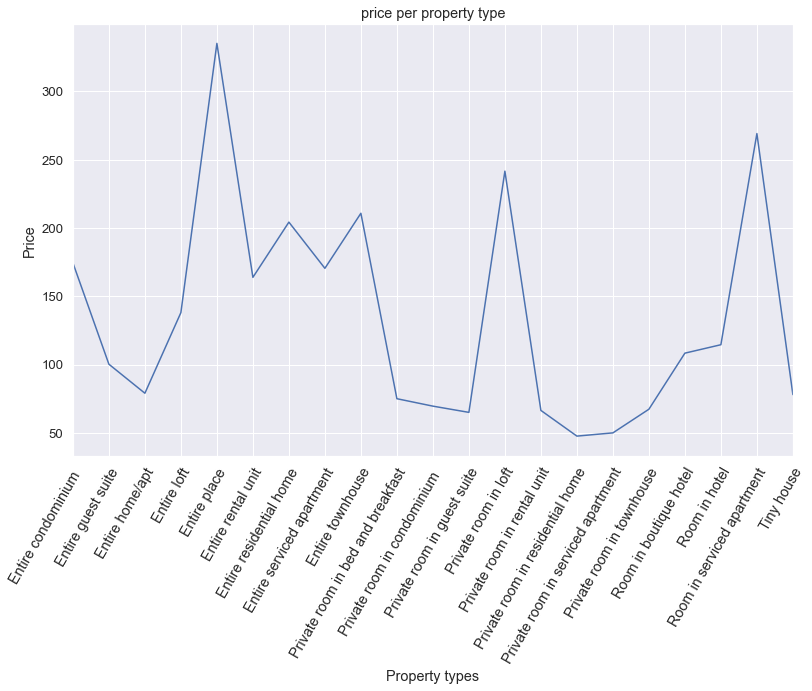

In [61]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_axes([.1,.1,1,1])

grouped_by_property_type.price.plot()

ax.set_xticks(range(len(grouped_by_property_type.property_type.unique())))
ax.set_xticklabels(grouped_by_property_type.property_type,rotation=60,ha='right',rotation_mode='anchor',fontsize='medium')
ax.set_title('price per property type')
ax.set_ylabel('Price')
ax.set_xlabel('Property types')

## Renaming Columns and Values
- I have identified that the 'neighbourhood_cleansed' column is confusing, so I will change the header to "Ward" 
- Then I will rename each value in that column to its proper name.

In [63]:
df_no_outlier.rename(columns={'neighbourhood_cleansed':'Ward'}, inplace=True)

c:\users\yordy\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [64]:
df_no_outlier.Ward.value_counts()

Ward E (councilmember James Solomon)           223
Ward F (councilmember Jermaine D. Robinson)    139
Ward C (councilmember Richard Boggiano)        132
Ward D (councilmember Michael Yun)             107
Ward B (councilmember Mira Prinz-Arey)          65
Ward A (councilmember Denise Ridley)            53
Name: Ward, dtype: int64

In [65]:
df_no_outlier.loc[df_no_outlier.Ward == 'Ward A (councilmember Denise Ridley)', 'Ward'] = 'Greenville'
df_no_outlier.loc[df_no_outlier.Ward == 'Ward B (councilmember Mira Prinz-Arey)', 'Ward'] = 'West Side'
df_no_outlier.loc[df_no_outlier.Ward == 'Ward C (councilmember Richard Boggiano)', 'Ward'] = 'Journal Square'
df_no_outlier.loc[df_no_outlier.Ward == 'Ward D (councilmember Michael Yun)', 'Ward'] = 'Heights'
df_no_outlier.loc[df_no_outlier.Ward == 'Ward F (councilmember Jermaine D. Robinson)', 'Ward'] = 'Downtown'
df_no_outlier.loc[df_no_outlier.Ward == 'Ward E (councilmember James Solomon)', 'Ward'] = 'Bergen-Lafayette'

c:\users\yordy\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [66]:
df_no_outlier.Ward.value_counts()

Bergen-Lafayette    223
Downtown            139
Journal Square      132
Heights             107
West Side            65
Greenville           53
Name: Ward, dtype: int64

In [67]:
df_no_outlier.room_type.value_counts()

Entire home/apt    468
Private room       239
Hotel room          12
Name: room_type, dtype: int64

In [68]:
df_no_outlier.host_is_superhost= (df.host_is_superhost=='t').astype(int)

c:\users\yordy\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [69]:
df_no_outlier

,id,description,host_name,host_is_superhost,Ward,neighbourhood,latitude,longitude,property_type,room_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,amenities_count,zscore
0,40669,<b>The space</b><br />Skyy’s Lounge ....Everyt...,Skyy,0,Journal Square,Jersey City,40.73742,-74.05255,Private room in condominium,Private room,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.07,44,-0.117051
1,215768,Walking to distance to Statue of Liberty and E...,Charlaine,1,Downtown,Jersey City,40.71663,-74.05799,Entire residential home,Entire home/apt,...,4.76,4.78,4.88,4.84,4.90,4.31,4.80,1.10,41,-0.243231
2,269266,Enjoy that private luxury two bedrooms apartme...,Magda,0,Downtown,Jersey City,40.71266,-74.06329,Entire rental unit,Entire home/apt,...,4.34,4.62,4.55,4.68,4.65,3.80,4.44,3.10,45,-0.258075
3,270245,Just for you small bedroom with private bathro...,Magda,0,Downtown,Jersey City,40.71203,-74.06532,Private room in townhouse,Private room,...,4.50,4.65,4.68,4.71,4.68,3.89,4.57,2.04,39,-0.725682
4,271255,You can enjoy your stay in large bedroom with ...,Magda,0,Downtown,Jersey City,40.71258,-74.06284,Private room in townhouse,Private room,...,4.38,4.55,4.65,4.64,4.56,3.76,4.37,2.43,41,-0.606924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,53759149,Welcome to this spacious and conveniently loca...,Tamaya,0,Downtown,Jersey City,40.71440,-74.05805,Entire rental unit,Entire home/apt,...,5.00,5.00,4.00,5.00,5.00,5.00,5.00,1.00,38,-0.287765
988,53769304,Located by the Hackensack River Waterfront is ...,Rhianna,0,West Side,Jersey City,40.71598,-74.09168,Entire rental unit,Entire home/apt,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00,19,-0.042828
993,53798736,Enjoy a central Jersey City location about 20-...,Robert,0,Heights,Jersey City,40.74452,-74.05993,Entire rental unit,Entire home/apt,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,18,0.150152
997,53834917,Keep it simple at this peaceful and centrally-...,Booker,0,Bergen-Lafayette,Jersey City,40.71918,-74.03405,Entire rental unit,Entire home/apt,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00,31,-0.109629


## Now that we have the data cleaned lets see how different features how an affect on the price column

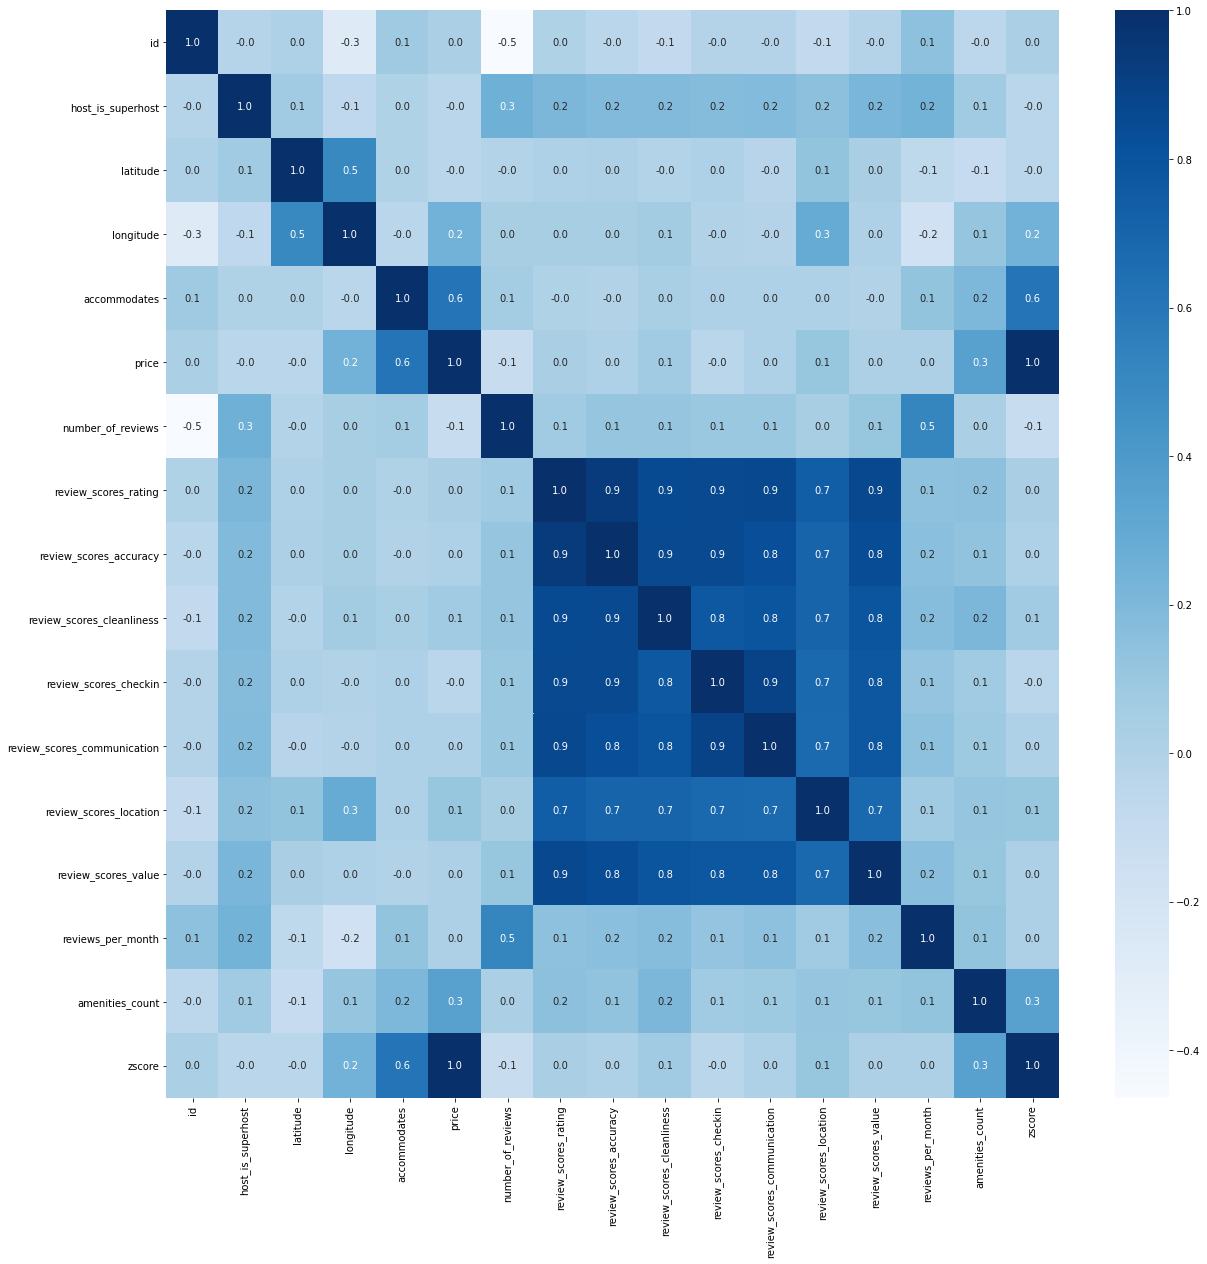

In [69]:
correlation_matrix = df_no_outlier.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig('Correlation Heat map')

In [70]:
price_indexed = df_no_outlier.set_index(['price']).reset_index().copy()
price_indexed=price_indexed.drop(['description'],axis=1)

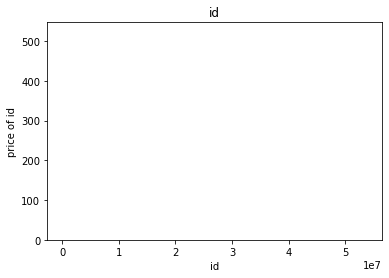

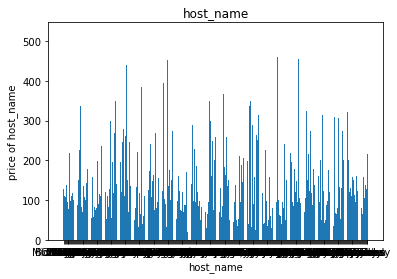

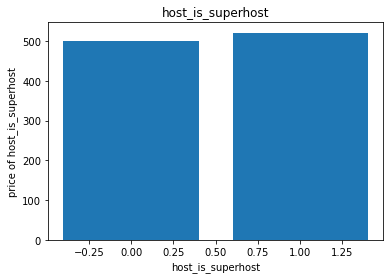

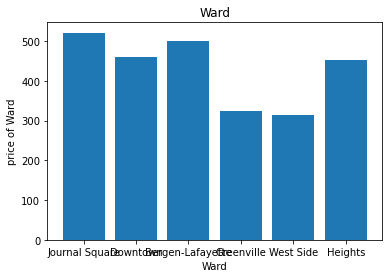

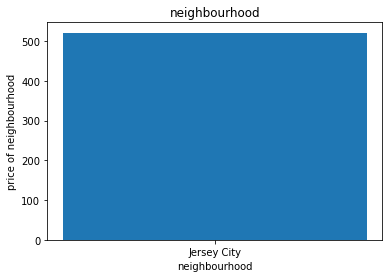

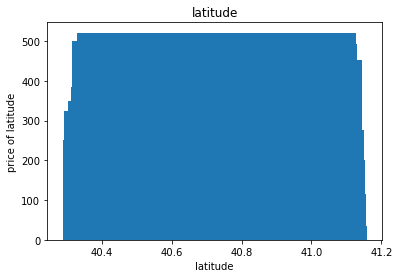

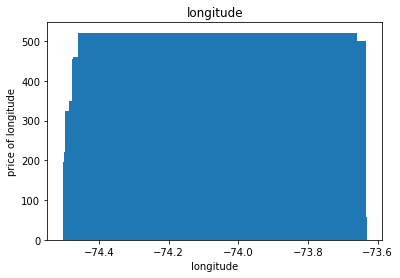

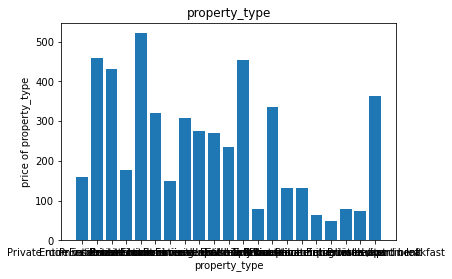

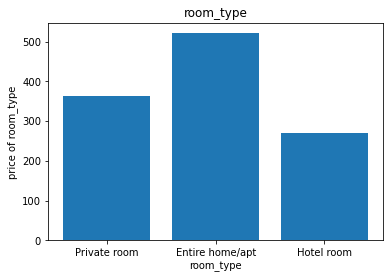

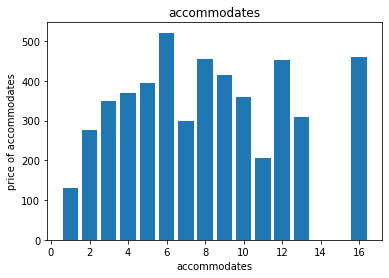

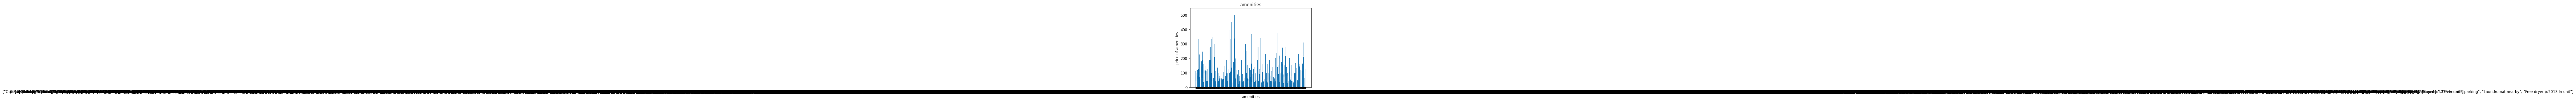

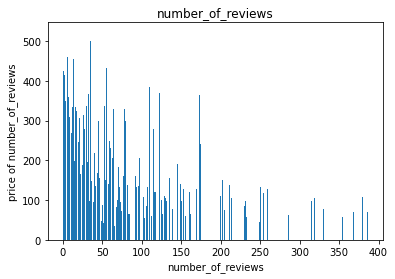

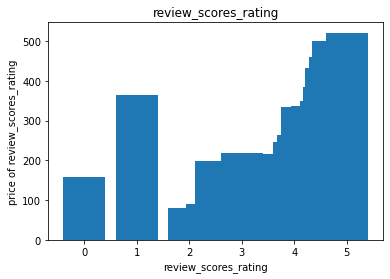

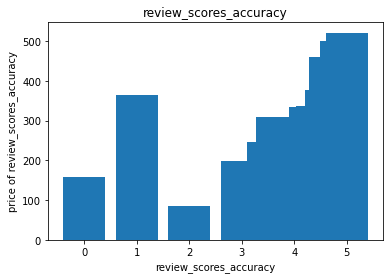

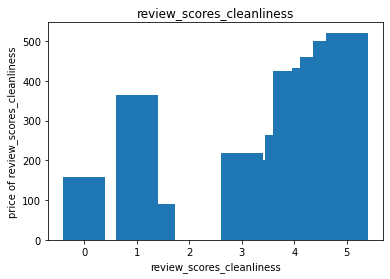

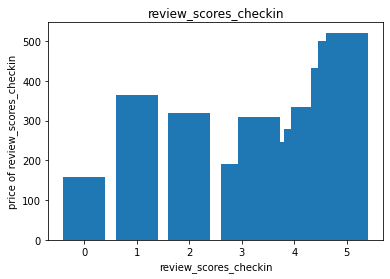

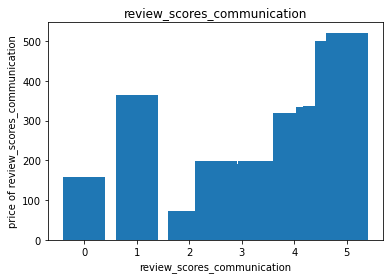

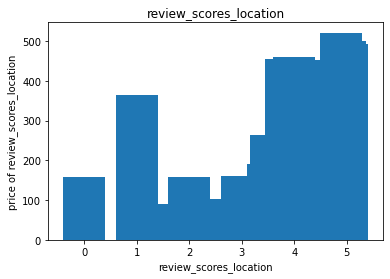

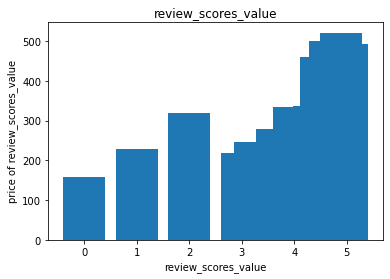

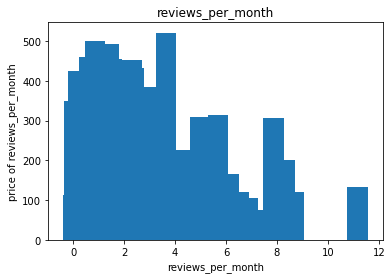

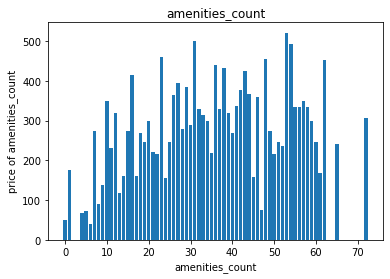

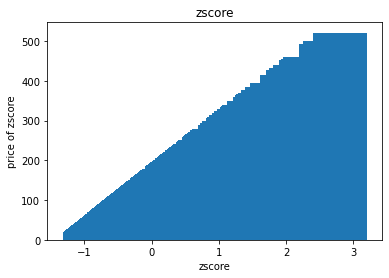

In [71]:
for label in price_indexed.columns[1:]:
    plt.bar(price_indexed[label],price_indexed['price'])
    plt.title(label)
    plt.ylabel("price of " + label)
    plt.xlabel(label)
    plt.show()

,Min,Median,Mean,Max,total
Ward,,,,,
Bergen-Lafayette,32,150,174.726457,501,223
Downtown,24,84,111.841727,460,139
Greenville,26,85,110.981132,323,53
Heights,19,84,101.700935,453,107
Journal Square,21,100,117.848485,521,132
West Side,29,100,118.800000,313,65


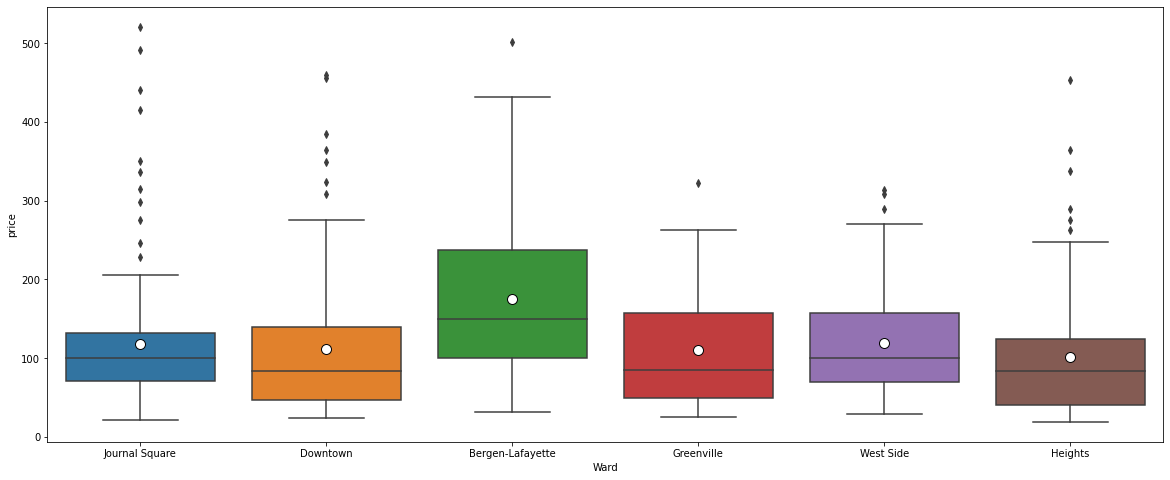

In [72]:


plt.figure(figsize=(20,8))
df_plot=sns.boxplot(x='Ward',y='price', data=df_no_outlier,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
df1=df_no_outlier.groupby('Ward')['price'].agg(Min='min',Median='median',Mean='mean',Max='max',total='count')

df1

"df3=df_no_outlier.groupby('Ward')['price'].agg(Min='min',Median='median',Mean='mean',Max='max')\n"

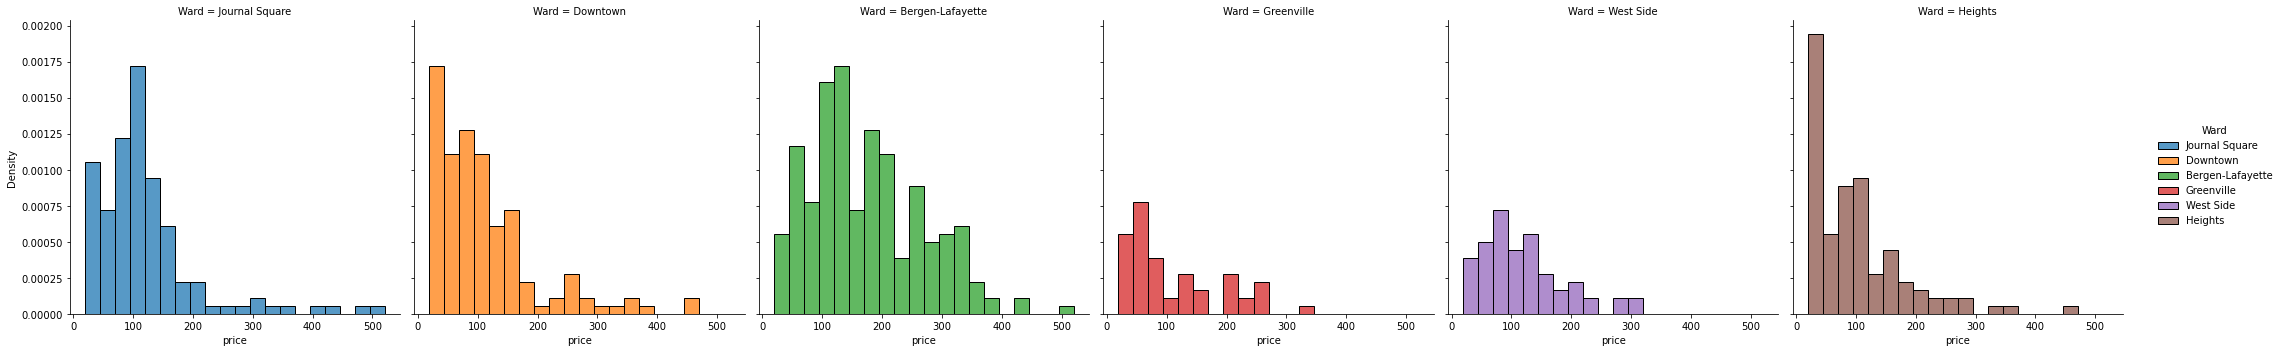

In [73]:
sns.displot(df_no_outlier, x="price", col='Ward',hue="Ward", stat="density")
'''df3=df_no_outlier.groupby('Ward')['price'].agg(Min='min',Median='median',Mean='mean',Max='max')
'''


,Min,Median,Mean,Max,total
Ward,,,,,
Bergen-Lafayette,0.0,4.74,4.609058,5.0,223
Downtown,0.0,4.68,4.549496,5.0,139
Greenville,3.0,4.74,4.658868,5.0,53
Heights,3.0,4.80,4.712243,5.0,107
Journal Square,0.0,4.69,4.528106,5.0,132
West Side,1.0,4.79,4.671538,5.0,65


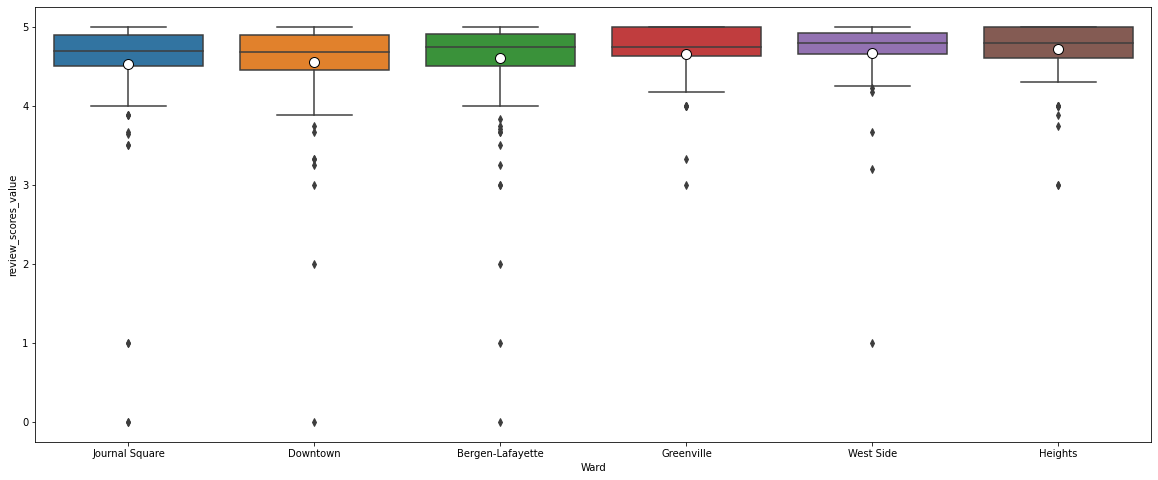

In [74]:
plt.figure(figsize=(20,8))
df_plot2=sns.boxplot(x='Ward',y='review_scores_value', data=df_no_outlier,showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
df2=df_no_outlier.groupby('Ward')['review_scores_value'].agg(Min='min',Median='median',Mean='mean',Max='max',total='count')
df2


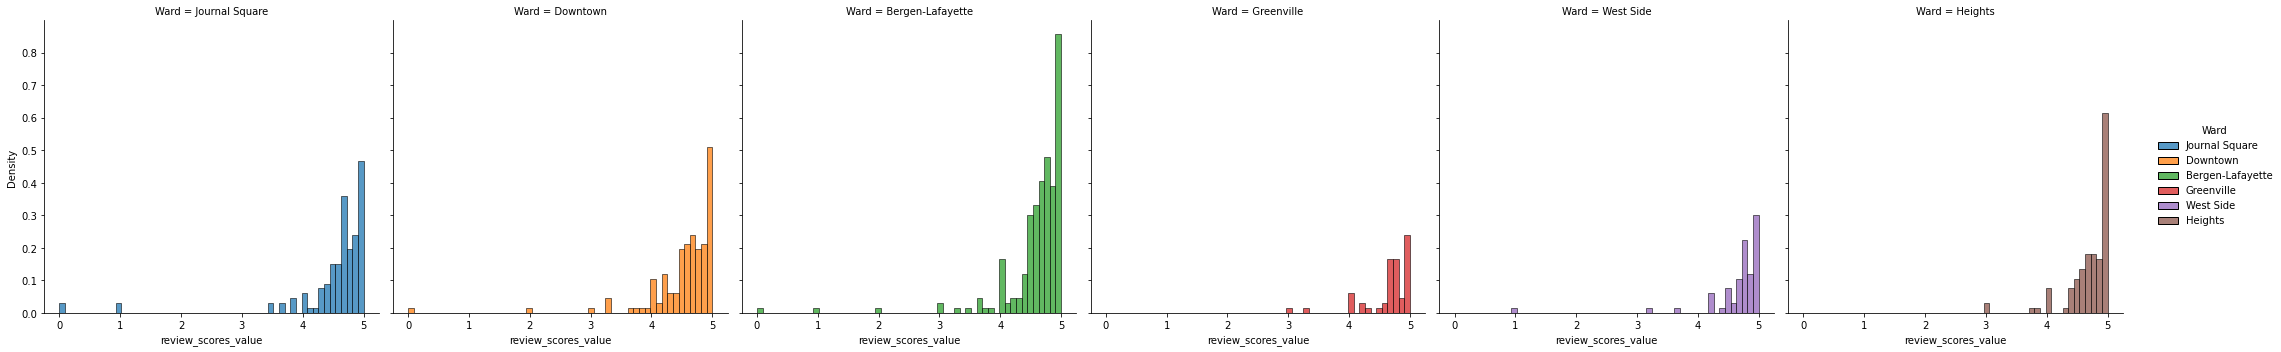

In [75]:
d3=sns.displot(df_no_outlier, x="review_scores_value", col='Ward',hue="Ward", stat="density")
d3

### seeing that the mean review score is lower than the median means that the data are "skewed to the left", with a long tail of low scores pulling the mean down more than the median.

In [76]:
greater_than_avg=df_no_outlier[df_no_outlier.price >= df_no_outlier.groupby("property_type").price.transform('mean')].sort_values(by=['property_type'])
greater_than_avg

,id,description,host_name,host_is_superhost,Ward,neighbourhood,latitude,longitude,property_type,room_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,amenities_count,zscore
999,53858569,A very spacious and comfortable one-bedroom ap...,Tim,1,Bergen-Lafayette,Jersey City,40.71510,-74.04845,Entire condominium,Entire home/apt,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00,50,0.536113
658,46143648,"Wake up in this bright, cozy, spacious apartme...",Anthony,0,West Side,Jersey City,40.71734,-74.07954,Entire condominium,Entire home/apt,...,4.63,4.79,4.42,4.95,4.95,4.58,4.79,1.39,37,0.714249
498,39690438,Great location in the heart of Jersey City Hei...,Michael,0,Heights,Jersey City,40.74478,-74.05925,Entire condominium,Entire home/apt,...,4.33,4.43,4.53,4.87,4.57,4.50,4.37,1.21,41,1.441636
492,39647791,"Newly constructed 4 bedroom, 2.5 bath duplex w...",Joseph,0,Journal Square,Jersey City,40.73405,-74.05163,Entire condominium,Entire home/apt,...,4.85,4.92,4.77,4.96,4.85,4.54,4.77,1.08,38,1.270923
669,46615771,Beautiful Farm House decor brings true warmth ...,Sammi (Xiao),1,Greenville,Jersey City,40.70049,-74.08540,Entire condominium,Entire home/apt,...,5.00,5.00,5.00,5.00,5.00,4.00,5.00,0.17,42,0.781049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,23843034,Private room with private bathroom on first fl...,Elizabeth,1,Journal Square,Jersey City,40.73132,-74.05905,Room in hotel,Private room,...,4.63,4.74,4.56,4.88,4.74,4.74,4.69,2.58,22,-0.169008
392,33069868,"Quaint and quiet rooming house, walking distan...",Elizabeth,1,Journal Square,Jersey City,40.73104,-74.05998,Room in hotel,Private room,...,4.59,4.86,4.62,4.87,4.75,4.75,4.68,1.87,25,-0.087362
266,23836134,"Private rooming house offering, clean, quiet r...",Elizabeth,1,Journal Square,Jersey City,40.73138,-74.05914,Room in hotel,Hotel room,...,4.53,4.83,4.39,4.76,4.76,4.86,4.71,1.45,20,-0.087362
90,10384214,"Soaring 50 stories above the Hudson River, thi...",Global Luxury Suites,0,Bergen-Lafayette,Jersey City,40.72344,-74.03733,Room in serviced apartment,Hotel room,...,4.45,4.45,4.45,4.30,4.40,4.80,4.10,0.16,58,0.929496


In [77]:
below_than_avg=df_no_outlier[df_no_outlier.price < df_no_outlier.groupby("property_type").price.transform('mean')].sort_values(by=['property_type'])
below_than_avg

,id,description,host_name,host_is_superhost,Ward,neighbourhood,latitude,longitude,property_type,room_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,amenities_count,zscore
479,38955850,"Greetings from Jersey City, NJ.!<br /><br />Th...",Lisa,1,Bergen-Lafayette,Jersey City,40.72376,-74.04870,Entire condominium,Entire home/apt,...,4.96,4.96,4.96,4.96,5.00,4.92,4.88,0.96,50,-0.139318
228,21864224,"Beautifully design studio, with state of the a...",Rishma,0,Bergen-Lafayette,Jersey City,40.71418,-74.04463,Entire condominium,Entire home/apt,...,4.96,5.00,4.91,4.96,5.00,4.96,4.74,0.51,32,0.023973
206,21754019,Downtown completely renovated 2nd story Histor...,Ken,1,Bergen-Lafayette,Jersey City,40.71834,-74.04247,Entire condominium,Entire home/apt,...,5.00,5.00,4.97,4.95,4.97,4.92,4.90,1.60,33,0.009128
922,53155352,"newly renovated condo located in Jersey City, ...",Sammi (Xiao),1,Downtown,Jersey City,40.71746,-74.07688,Entire condominium,Entire home/apt,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00,38,-0.243231
56,6628558,Beautiful&Large Condo. features one full-size ...,Jie,0,West Side,Jersey City,40.72534,-74.07198,Entire condominium,Entire home/apt,...,4.38,4.68,4.22,4.86,4.86,4.51,4.46,0.48,11,-0.458478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,40203994,Private room with double bed and sink in the r...,Elizabeth,1,Journal Square,Jersey City,40.73103,-74.05864,Room in hotel,Private room,...,4.77,4.73,4.73,4.77,4.64,4.50,4.32,0.89,23,-0.295187
451,37777141,Bright and airy private room with shared bathr...,Elizabeth,1,Journal Square,Jersey City,40.73387,-74.07008,Room in hotel,Hotel room,...,4.62,4.66,4.41,4.72,4.79,4.83,4.62,1.03,25,-0.272920
274,23905194,Cozy room with private bathroom. Great locatio...,Elizabeth,1,Journal Square,Jersey City,40.73164,-74.05875,Room in hotel,Hotel room,...,4.52,4.78,4.53,4.90,4.77,4.82,4.66,2.74,18,-0.324876
355,30317627,Bright and airy private room with a shared bat...,Elizabeth,1,Journal Square,Jersey City,40.73064,-74.06031,Room in hotel,Hotel room,...,4.57,4.77,4.47,4.97,4.57,4.83,4.60,0.82,25,-0.243231


[Text(0.5, 1.0, 'Below average price review scores')]

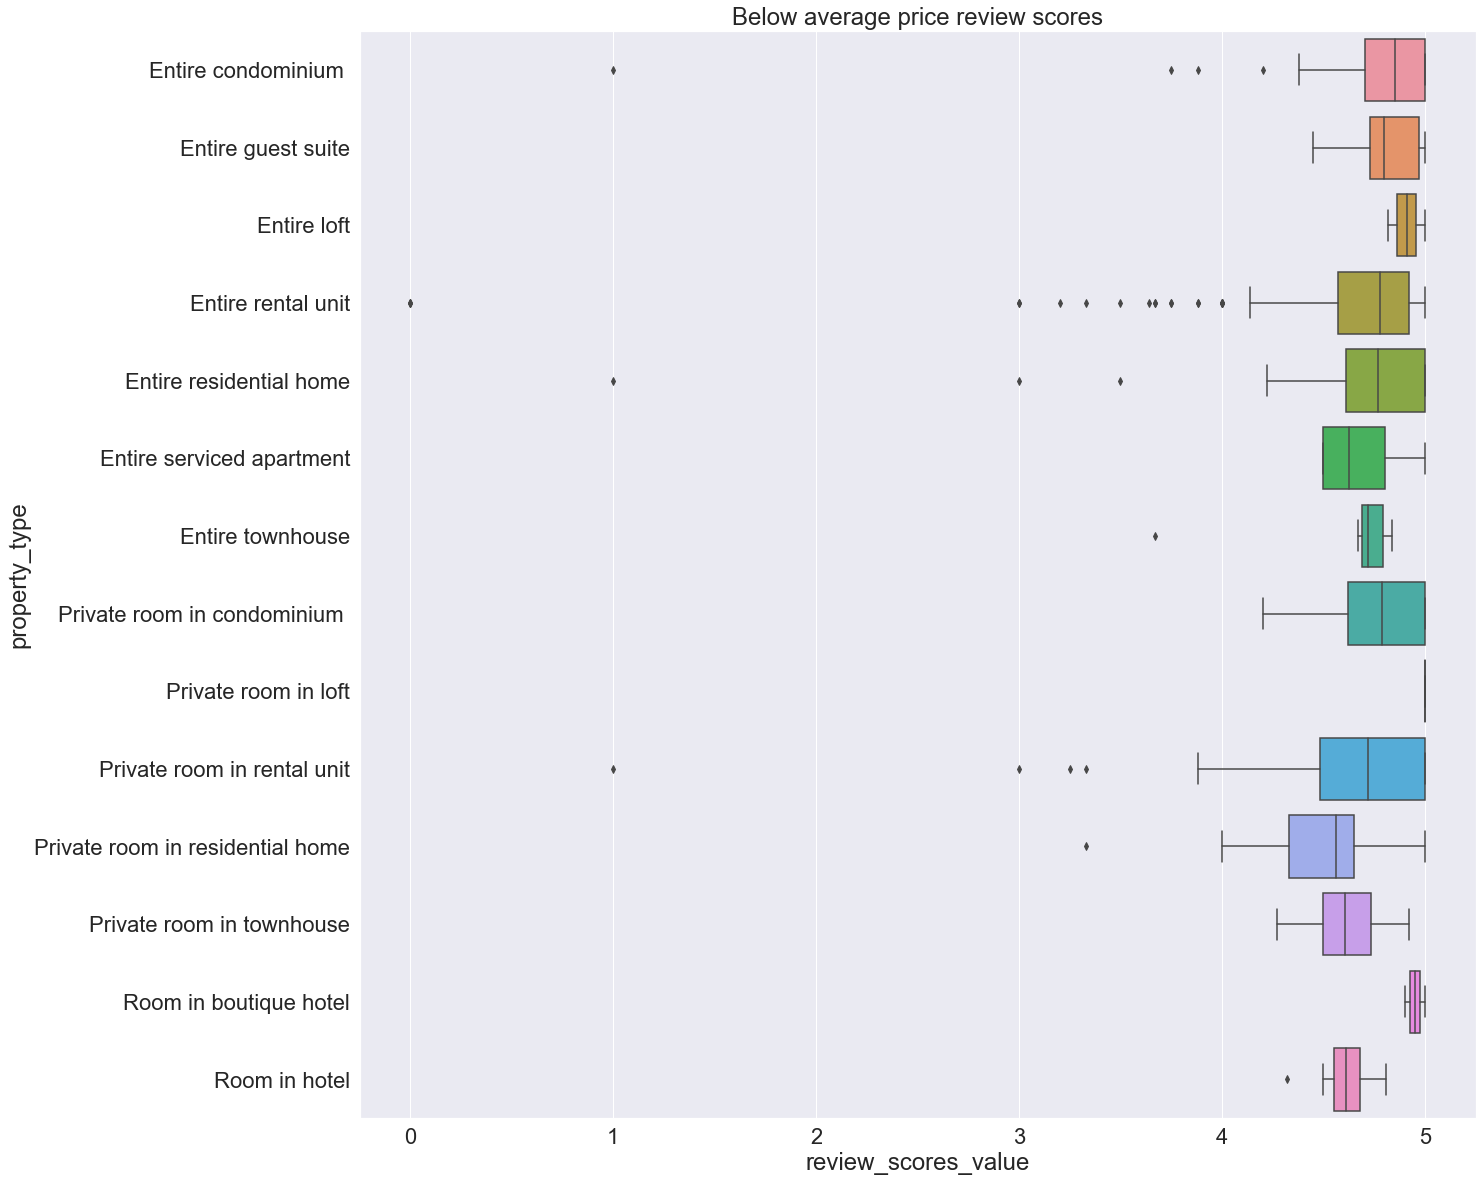

In [78]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=2)

sns.boxplot(x='review_scores_value',y='property_type', data=below_than_avg).set(title='Below average price review scores')

[Text(0.5, 1.0, 'Below average price review scores')]

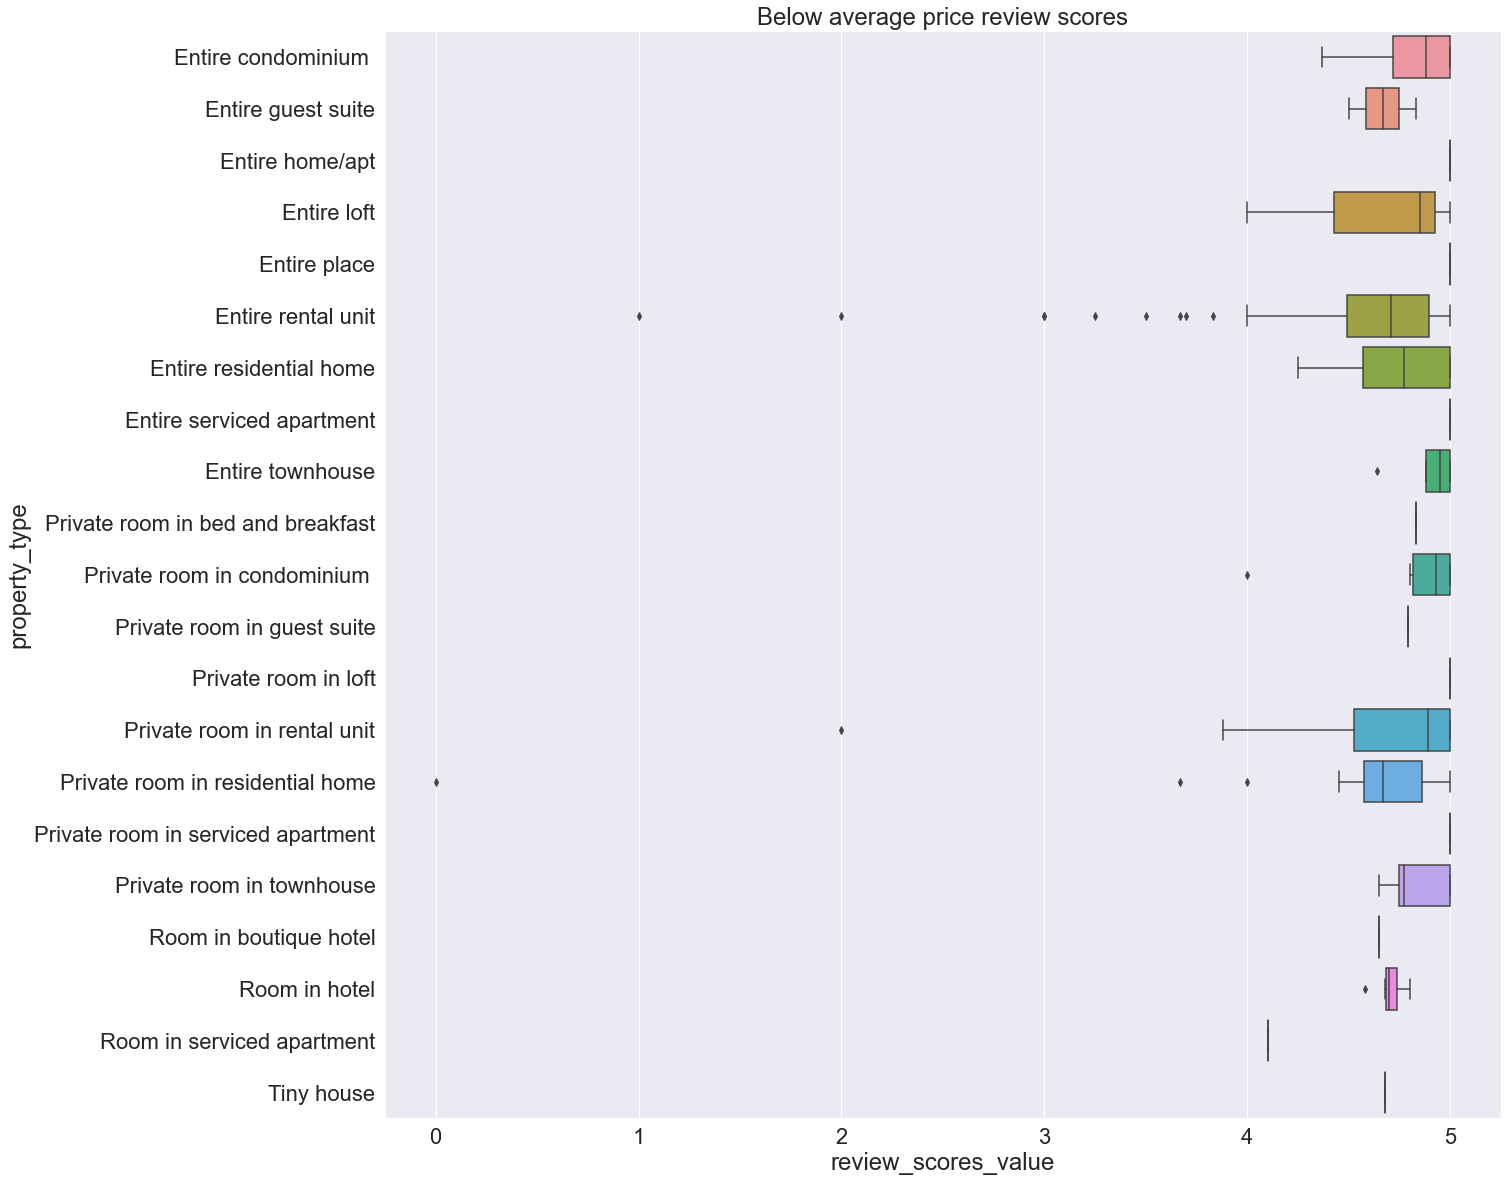

In [79]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=2)

sns.boxplot(x='review_scores_value',y='property_type', data=greater_than_avg).set(title='Below average price review scores')

In [80]:
df_no_outlier.property_type.value_counts()

Entire rental unit                    339
Private room in residential home      101
Private room in rental unit            94
Entire condominium                     52
Entire residential home                34
Private room in townhouse              17
Private room in condominium            16
Room in hotel                          14
Entire townhouse                       13
Entire guest suite                     12
Entire serviced apartment              10
Entire loft                             5
Room in boutique hotel                  3
Private room in loft                    2
Room in serviced apartment              1
Tiny house                              1
Private room in serviced apartment      1
Entire place                            1
Private room in guest suite             1
Entire home/apt                         1
Private room in bed and breakfast       1
Name: property_type, dtype: int64

c:\users\yordy\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


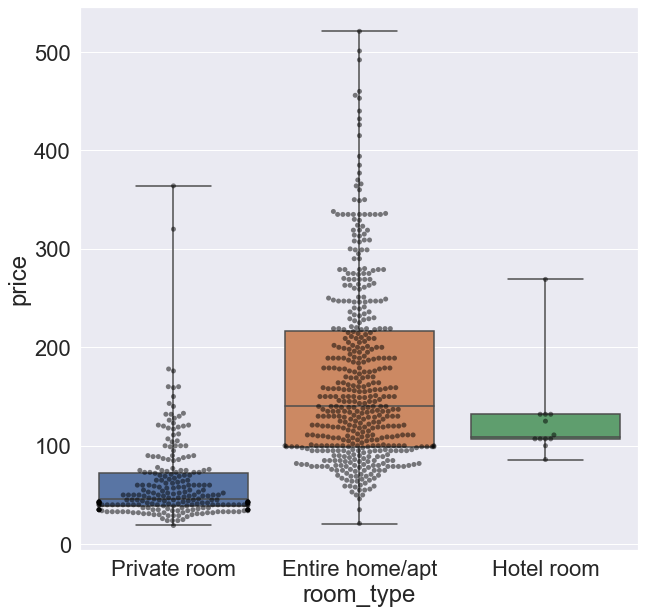

In [81]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=2)
sns.boxplot(x="room_type", y="price",whis=np.inf, data=df_no_outlier)
sns.swarmplot(x="room_type", y="price",color='black',alpha=.5 ,data=df_no_outlier)


In [82]:
df.groupby(["amenities"])["id"].transform("count")

0        1
1        1
2        1
3        1
4        1
        ..
996      1
997      1
998     18
999      1
1000     1
Name: id, Length: 1001, dtype: int64

#  Super Host

In [83]:
df_no_outlier.host_is_superhost.value_counts()

0    510
1    209
Name: host_is_superhost, dtype: int64

In [84]:
df_no_outlier.host_is_superhost.value_counts()

0    510
1    209
Name: host_is_superhost, dtype: int64

In [85]:
df_no_outlier.loc[df_no_outlier.host_is_superhost == 'f', 'host_is_superhost'] = 0
df_no_outlier.loc[df_no_outlier.host_is_superhost == 't', 'host_is_superhost'] = 1

c:\users\yordy\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
c:\users\yordy\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Before I continoue to Modeling I will first drop the columns that I believe I do not need anymore, and second convert all the 'object' dtypes to types that can be used for the algorithms

In [86]:
df_no_outlier.dtypes

id                               int64
description                     object
host_name                       object
host_is_superhost                int32
Ward                            object
neighbourhood                   object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
amenities                       object
price                            int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
amenities_count                  int64
zscore                         float64
dtype: object

In [87]:
df_no_outlier.drop(['id','description','host_name','neighbourhood','latitude','longitude','reviews_per_month'],axis=1,inplace=True)

c:\users\yordy\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [88]:
df_no_outlier.drop(['zscore'],axis=1,inplace=True)

In [89]:
df_no_outlier.drop(['amenities'],axis=1,inplace=True)

In [91]:
df_no_outlier.dtypes

host_is_superhost                int32
Ward                            object
property_type                   object
room_type                       object
accommodates                     int64
price                            int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
amenities_count                  int64
dtype: object

# trying onehotencoder

In [295]:
df=pd.get_dummies(df_no_outlier)

In [115]:
df

,host_is_superhost,accommodates,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,...,property_type_Private room in residential home,property_type_Private room in serviced apartment,property_type_Private room in townhouse,property_type_Room in boutique hotel,property_type_Room in hotel,property_type_Room in serviced apartment,property_type_Tiny house,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room
0,0,2,128,10,5.00,5.00,5.00,5.00,5.00,5.00,...,0,0,0,0,0,0,0,0,0,1
1,1,4,111,137,4.76,4.78,4.88,4.84,4.90,4.31,...,0,0,0,0,0,0,0,1,0,0
2,0,5,109,380,4.34,4.62,4.55,4.68,4.65,3.80,...,0,0,0,0,0,0,0,1,0,0
3,0,1,46,249,4.50,4.65,4.68,4.71,4.68,3.89,...,0,0,1,0,0,0,0,0,0,1
4,0,5,62,286,4.38,4.55,4.65,4.64,4.56,3.76,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,0,3,105,1,5.00,5.00,4.00,5.00,5.00,5.00,...,0,0,0,0,0,0,0,1,0,0
988,0,3,138,2,5.00,5.00,5.00,5.00,5.00,5.00,...,0,0,0,0,0,0,0,1,0,0
993,0,5,164,1,5.00,5.00,5.00,5.00,5.00,5.00,...,0,0,0,0,0,0,0,1,0,0
997,0,4,129,2,5.00,5.00,5.00,5.00,5.00,5.00,...,0,0,0,0,0,0,0,1,0,0


In [338]:
df.dtypes

host_is_superhost                                     int32
accommodates                                          int64
price                                                 int64
number_of_reviews                                     int64
review_scores_rating                                float64
review_scores_accuracy                              float64
review_scores_cleanliness                           float64
review_scores_checkin                               float64
review_scores_communication                         float64
review_scores_location                              float64
review_scores_value                                 float64
amenities_count                                       int64
Ward_Bergen-Lafayette                                 uint8
Ward_Downtown                                         uint8
Ward_Greenville                                       uint8
Ward_Heights                                          uint8
Ward_Journal Square                     

# ending

In [398]:
df_reset= df_no_outlier.set_index(['price']).reset_index().copy()
df_reset.dtypes

price                            int64
host_is_superhost                int32
Ward                            object
property_type                   object
room_type                       object
accommodates                     int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
amenities_count                  int64
dtype: object

In [399]:
X=df_reset.iloc[:,1:].values
y=df_reset.price.values
X

array([[0, 'Journal Square', 'Private room in condominium ', ..., 5.0,
        5.0, 44],
       [1, 'Downtown', 'Entire residential home', ..., 4.31, 4.8, 41],
       [0, 'Downtown', 'Entire rental unit', ..., 3.8, 4.44, 45],
       ...,
       [0, 'Heights', 'Entire rental unit', ..., 5.0, 5.0, 18],
       [0, 'Bergen-Lafayette', 'Entire rental unit', ..., 5.0, 5.0, 31],
       [1, 'Bergen-Lafayette', 'Entire condominium ', ..., 5.0, 5.0, 50]],
      dtype=object)

In [403]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
categ=['Ward', 'property_type','room_type']
ct= ColumnTransformer([('one-hot-encoder',OneHotEncoder(),categ)],remainder='passthrough')
X=ct.fit_transform(df_reset)


In [453]:
np.set_printoptions(threshold=np.inf)
X[0]

array([  0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1., 128.,   0.,   2.,
        10.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,  44.])

In [454]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.3,random_state=1234)

In [455]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [456]:
y_pred=regressor.predict(X_test)
y_pred

array([ 31., 111., 100., 111., 130., 215.,  41., 230., 239., 100., 130.,
       140., 121., 130.,  40., 110., 198.,  43.,  55.,  60.,  42., 110.,
        86., 202., 120.,  35., 426., 178.,  76.,  33., 335.,  79.,  47.,
        72.,  45.,  79., 225., 119.,  95., 112., 110., 251., 279., 309.,
        44., 160., 279.,  89.,  42., 275.,  65.,  33., 130., 228., 149.,
       189., 143.,  79., 109.,  46., 247.,  47., 100., 211.,  64.,  70.,
        95.,  60., 209.,  85., 175., 269.,  50., 110., 155., 164.,  37.,
        80., 127.,  60., 150., 158.,  71.,  99.,  90.,  33., 185., 176.,
        94.,  63.,  99.,  70.,  45., 150.,  78.,  45., 125.,  40., 319.,
       364., 111.,  41., 150.,  78.,  80., 319., 143., 385., 158., 116.,
       130., 300., 270.,  44.,  84.,  19., 159., 229., 132., 169.,  89.,
        95., 115.,  83., 274.,  34.,  81., 219.,  57.,  79., 149., 120.,
       132., 218., 135.,  89.,  79., 102.,  60., 145.,  34., 131.,  73.,
       100.,  40., 240., 164., 246.,  43., 140.,  2

In [457]:
print(regressor.coef_)

[-1.69909825e-14 -7.66053887e-15  1.09755954e-14 -2.89828925e-15
  2.47718512e-15  1.46900721e-14 -1.82485320e-14  1.59205060e-14
  3.86577638e-14 -2.54515105e-15  8.13151629e-20 -2.47935353e-14
 -2.15208710e-14  1.82735771e-14 -1.81627987e-14  1.62630326e-19
  1.72598481e-14  5.42101086e-20 -3.68836770e-14  2.16864829e-14
  2.64168028e-14  2.71050543e-20  2.92826202e-14  4.21713988e-15
  7.24225367e-15 -5.68045096e-14  2.71050543e-20 -1.24180180e-14
  5.03736592e-15  7.37994735e-15  1.00000000e+00  3.72835443e-15
  3.81313904e-15  0.00000000e+00 -5.77012396e-16  7.96671756e-16
  1.52395457e-15  7.43979531e-16 -3.27754317e-15 -5.07146408e-15
 -4.57053557e-15 -2.49800181e-16]


In [459]:
print(regressor.intercept_)

2.842170943040401e-14


In [460]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

# Modeling

In [117]:
# x is the independent variable
# y is the dependant variable

X=df.drop('price', axis =1)
y=df.price

In [428]:
X.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [119]:
y

0      128
1      111
2      109
3       46
4       62
      ... 
987    105
988    138
993    164
997    129
999    216
Name: price, Length: 718, dtype: int64

In [97]:
# split into training and testing

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.3,random_state=1234)

In [122]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(502, 41) (216, 41) (502,) (216,)


### Import Dependecies

In [429]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [430]:
piplelines= {
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234))
    
}

In [431]:
hypergrid={
    'rf':{
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
        
    },
    'ridge':{
        'ridge__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
        
    },
    'lasso':{
        'lasso__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99] 
    },
    'enet':{
        'elasticnet__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
        
    }
    
}

In [432]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [433]:
fit_models={}
for algo,pipeline in piplelines.items():
    model=GridSearchCV(pipeline,hypergrid[algo], cv=10,n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train,y_train)
        fit_models[algo]=model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))
        

Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.
lasso has been successfully fit.
Starting training for enet.
enet has been successfully fit.


In [420]:
predicted=fit_models['gb'].predict(X_test)
expected=y_test

## Evaluation

In [421]:
from sklearn.metrics import r2_score, mean_absolute_error

In [435]:
for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} scores - R2:{} MAE:{}'.format(algo,r2_score(y_test,yhat),mean_absolute_error(y_test,yhat)))

rf scores - R2:0.9997459332631351 MAE:0.536388888888889
gb scores - R2:0.9998233134065144 MAE:0.5313051443337111
ridge scores - R2:1.0 MAE:2.2705225485761156e-08
lasso scores - R2:0.9999999999999812 MAE:8.882524110234815e-06
enet scores - R2:0.9999999999999463 MAE:1.504961234571272e-05


In [110]:
Deployment

NameError: name 'Deployment' is not defined